In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [76]:
check_result_df = pd.read_csv('./../results/05-10-02-18-16/val_result.csv')
check_result_df['correct'] = check_result_df['target'] == check_result_df['predict']

In [77]:
check_result_df.columns

Index(['sentence', 'tokenized', 'target', 'predict', 'correct'], dtype='object')

In [78]:
check_result_df.head()

sentence   
0  Ïπ¥Î•ºÎ°ú 3ÏÑ∏(1345ÎÖÑ ~ 1386ÎÖÑ 2Ïõî 24Ïùº) ÎòêÎäî Ïπ¥Î°úÏù¥ 2ÏÑ∏Îäî ÎÇòÌè¥Î¶¨ ÏôïÍµ≠...  \
1  ÍπÄÏÑ†Ïàò ÎåÄÎ≤ïÍ¥ÄÏù¥ 2018ÎÖÑ 8ÏõîÏóê Ï∑®ÏûÑÌïòÎ©¥ÏÑú "ÌäπÏ†ï Î°úÌéåÍ≥º Í¥ÄÍ≥ÑÏûàÎäî ÎåÄÎ≤ïÍ¥ÄÏùò ÏÇ¨Í±¥Ï≤ò...   
2  ÌïúÌé∏ ÏßÄÏó≠ Ï†ÑÌÜµÏãúÏû• ÌôúÏÑ±ÌôîÏôÄ ÏÜåÏô∏Í≥ÑÏ∏µ ÏßÄÏõêÏùÑ ÏúÑÌï¥ 2008ÎÖÑ Î∂ÄÏÇ∞ÏùÄÌñâÏóêÏÑú ÏãúÏûëÎêú Ï†Ñ...   
3  Îëê ÏÇ¨ÎûåÏùò ÏÉàÎ°úÏö¥ Ïôï Ï§ë ÌïÑÎ¶¨Ìè¨Ïä§ 3ÏÑ∏Îäî Ï†ïÏã†Ï†Å Í≤∞Ìï®Ïù¥ ÏûàÏóàÍ≥†, ÏïåÎ†âÏÇ∞ÎìúÎ°úÏä§ 4ÏÑ∏Îäî...   
4  ÊïÖÎ¨∏ÏßÄÏú§ Ïî®Îäî 1984ÎÖÑ 2Ïõî 18Ïùº ÏÉùÏúºÎ°ú, 2002ÎÖÑ MBC ÎìúÎùºÎßà 'Î°úÎßùÏä§'Î°ú...   

                                           tokenized             target   
0  [CLS] Ïπ¥Î°úÏù¥ 2ÏÑ∏ [SEP] 1345ÎÖÑ [SEP] Ïπ¥Î•ºÎ°ú 3ÏÑ∏ ( 1345ÎÖÑ ...  per:date_of_birth  \
1  [CLS] ÍπÄÏÑ†Ïàò [SEP] ÎåÄÎ≤ïÍ¥Ä [SEP] ÍπÄÏÑ†Ïàò ÎåÄÎ≤ïÍ¥ÄÏù¥ 2018ÎÖÑ 8ÏõîÏóê Ï∑®...          per:title   
2  [CLS] Î∂ÄÏÇ∞ÏùÄÌñâ [SEP] BNKÍ∏àÏúµÍ∑∏Î£π [SEP] ÌïúÌé∏ ÏßÄÏó≠ Ï†ÑÌÜµÏãúÏû• ÌôúÏÑ±ÌôîÏôÄ...      org:member_of   
3  [CLS] ÏïåÎ†âÏÇ∞ÎìúÎ°úÏä§ 4ÏÑ∏ [SEP] ÌïÑÎ¶¨Ìè¨Ïä§ 3ÏÑ∏ [SEP] Îëê ÏÇ¨ÎûåÏùò ÏÉàÎ°úÏö¥ ...        no_relation   
4  [CLS] Î¨∏ÏßÄÏú§ [SEP] 2002ÎÖÑ MBC ÎìúÎùºÎßà'Î°úÎßùÏä§'[SEP] ÊïÖ Î¨∏ÏßÄÏú§ ...        no_relation   

             predict  correct  
0  per:date_of_birth     True  
1          per:title     True  
2      org:member_of     True  
3        no_relation     True  
4        no_relation     True

## Î†àÏù¥Î∏îÎ≥Ñ Ï†ïÎãµÎ•† ÌôïÏù∏

In [79]:
# Î†àÏù¥Î∏îÎ≥Ñ Ï†ïÎãµÎ•† ÌôïÏù∏
label_stats = pd.DataFrame()
label_counts = check_result_df.groupby('target')['predict'].count()
correct_counts = check_result_df.groupby('target')['predict'].apply(lambda x: (x == x.name).sum())
label_stats['total'] = label_counts
label_stats['correct'] = correct_counts
label_stats['correct_ratio'] = label_stats['correct'] / label_stats['total']
label_stats

total  correct  correct_ratio
target                                                            
no_relation                            947      687       0.725449
org:alternate_names                    127      106       0.834646
org:dissolved                            8        6       0.750000
org:founded                             41       40       0.975610
org:founded_by                          10        5       0.500000
org:member_of                          180      145       0.805556
org:members                             51       24       0.470588
org:number_of_employees/members          3        2       0.666667
org:place_of_headquarters              119       76       0.638655
org:political/religious_affiliation      9        3       0.333333
org:product                             43       39       0.906977
org:top_members/employees              412      394       0.956311
per:alternate_names                    102       88       0.862745
per:children                            32       17       0.531250
per:colleagues                          57       38       0.666667
per:date_of_birth                      106      104       0.981132
per:date_of_death                       51       50       0.980392
per:employee_of                        352      303       0.860795
per:origin                             124       99       0.798387
per:other_family                        31       19       0.612903
per:parents                             57       46       0.807018
per:place_of_birth                      20       13       0.650000
per:place_of_death                       2        1       0.500000
per:place_of_residence                  12        1       0.083333
per:product                             19        7       0.368421
per:religion                            11        9       0.818182
per:schools_attended                     7        7       1.000000
per:siblings                            15       12       0.800000
per:spouse                             102       95       0.931373
per:title                              197      178       0.903553

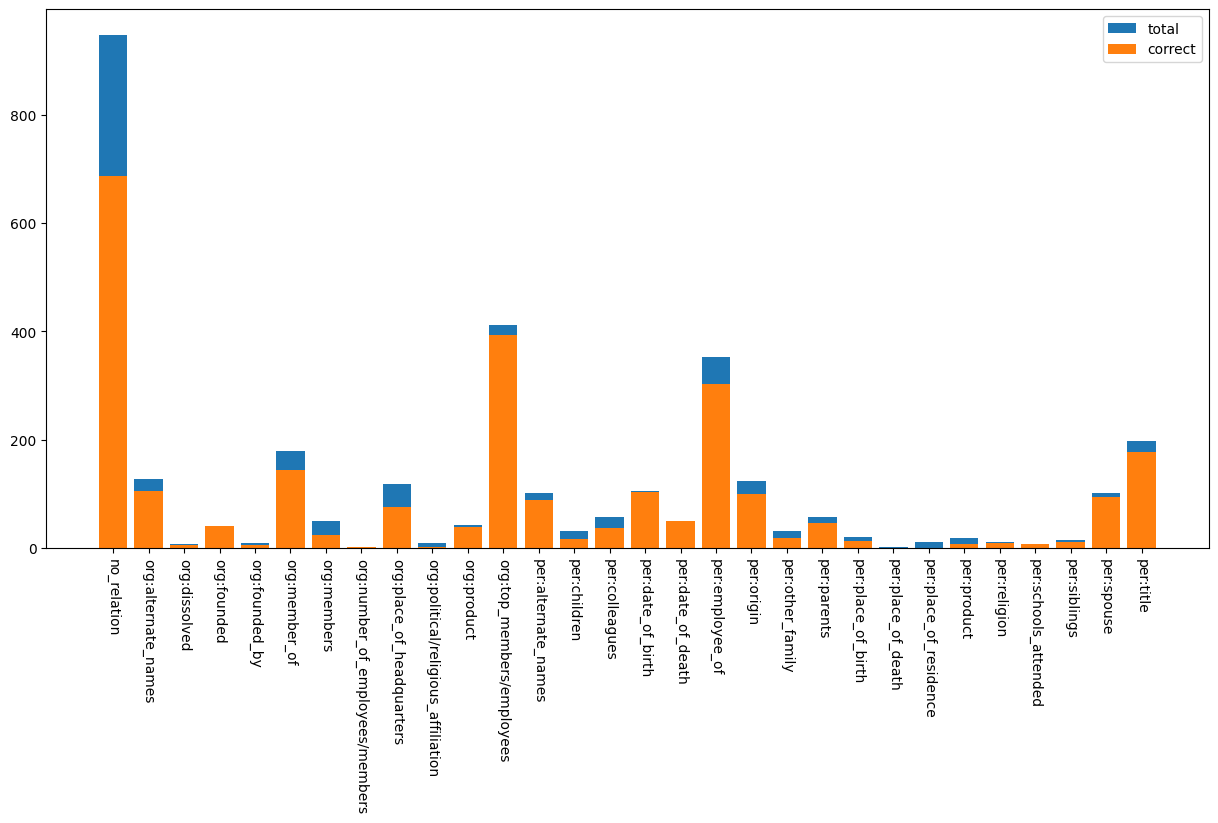

In [80]:
# Î†àÏù¥Î∏î Î≥Ñ Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÏôÄ Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÎπÑÍµê
plt.figure(figsize = (15, 7))
plt.bar(label_stats.index, label_stats['total'], label="total")
plt.bar(label_stats.index, label_stats['correct'], label="correct")
plt.legend()
plt.xticks(rotation=-90)
plt.show()

## HEATMAPÏúºÎ°ú Ï≤¥ÌÅ¨

In [81]:
df = check_result_df[['target','predict']]
labels = list(label_stats.index)

new_df = pd.DataFrame()#columns=labels,index=labels)
# new_df.fillna(0,inplace=True)

for trgt in labels:
    temp_lst = []
    for pred in labels:
        count = len(df[(df['target'] == trgt) & (df['predict'] == pred)])
        temp_lst.append(count)
    new_df[trgt] = temp_lst
new_df.columns = labels
new_df['predict'] = labels
new_df.set_index('predict',inplace=True)
# new_df.reset_index(inplace=True,drop=True)#labels,inplace=True)
new_df

no_relation  org:alternate_names   
predict                                                                 
no_relation                                  687                   13  \
org:alternate_names                            5                  106   
org:dissolved                                  3                    0   
org:founded                                   10                    0   
org:founded_by                                 0                    0   
org:member_of                                 36                    2   
org:members                                   15                    2   
org:number_of_employees/members                1                    0   
org:place_of_headquarters                     11                    2   
org:political/religious_affiliation            0                    0   
org:product                                    7                    0   
org:top_members/employees                     23                    1   
per:alternate_names                            2                    1   
per:children                                   1                    0   
per:colleagues                                20                    0   
per:date_of_birth                              2                    0   
per:date_of_death                              2                    0   
per:employee_of                               40                    0   
per:origin                                    20                    0   
per:other_family                               4                    0   
per:parents                                   13                    0   
per:place_of_birth                             3                    0   
per:place_of_death                             2                    0   
per:place_of_residence                         2                    0   
per:product                                    1                    0   
per:religion                                   3                    0   
per:schools_attended                           3                    0   
per:siblings                                   3                    0   
per:spouse                                    11                    0   
per:title                                     17                    0   

                                     org:dissolved  org:founded   
predict                                                           
no_relation                                      2            1  \
org:alternate_names                              0            0   
org:dissolved                                    6            0   
org:founded                                      0           40   
org:founded_by                                   0            0   
org:member_of                                    0            0   
org:members                                      0            0   
org:number_of_employees/members                  0            0   
org:place_of_headquarters                        0            0   
org:political/religious_affiliation              0            0   
org:product                                      0            0   
org:top_members/employees                        0            0   
per:alternate_names                              0            0   
per:children                                     0            0   
per:colleagues                                   0            0   
per:date_of_birth                                0            0   
per:date_of_death                                0            0   
per:employee_of                                  0            0   
per:origin                                       0            0   
per:other_family                                 0            0   
per:parents                                      0            0   
per:place_of_birth                               0            0   
per:place_of_death                               0            0   
per:place_of_residence   

In [ ]:
new_df.sum()

In [ ]:
# dataset normalizeÏïàÌïòÍ≥† heatmap 

labels = list(label_stats.index)

plt.pcolor(new_df)
plt.xticks(np.arange(0.5, len(labels), 1), labels)
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, len(labels), 1), labels)

plt.title('label accuracy', fontsize=14)
plt.xlabel('target', fontsize=14)
plt.ylabel('predict', fontsize=14)
plt.colorbar()

plt.show()

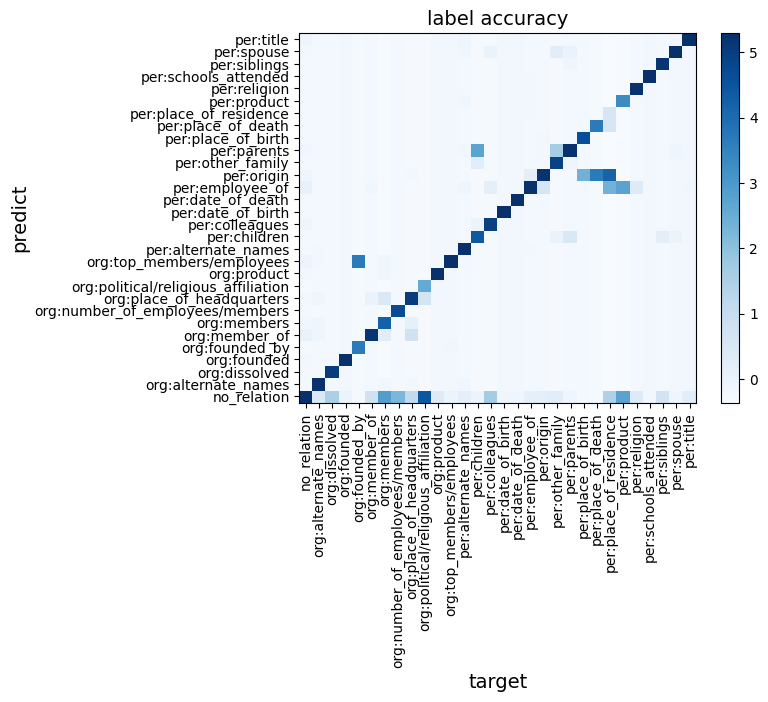

In [82]:
# dataset normalize ÌïòÍ≥† heatmap 

labels = list(label_stats.index)

normalization_df = (new_df - new_df.mean())/new_df.std()
normalization_df.head()

plt.pcolor(normalization_df,cmap='Blues')

plt.xticks(np.arange(0.5, len(labels), 1), labels)
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, len(labels), 1), labels)

plt.title('label accuracy', fontsize=14)
plt.xlabel('target', fontsize=14)
plt.ylabel('predict', fontsize=14)

plt.colorbar()

plt.show()

## üí° Í≤∞Î°†
- klue/bert-base 10 epoch (no earlystop)
- Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ïûò ÎßûÏ∂îÎäîÎç∞ per:place_of_residence, per:product, org:productÎ•º Ïûò Î™ªÎßûÏ∂îÎäî Í≤ΩÌñ•